In [1]:
import sys
sys.path.append('../src')
from data_processing import DataLoader, DataCleaner, EDAProcessor

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

In [2]:
loader = DataLoader("../data/raw/creditcard.csv")
cc_data = loader.load_data()

In [3]:
cleaner = DataCleaner(cc_data)

In [4]:
cleaner.data_overview()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
cleaner.missing_values_summary()


,missing_count,missing_pct
Time,0,0.0
V1,0,0.0
V2,0,0.0
V3,0,0.0
V4,0,0.0
V5,0,0.0
V6,0,0.0
V7,0,0.0
V8,0,0.0
V9,0,0.0


In [6]:
cleaner.handle_missing_values()  # should fill or report NaNs

,imputed_values_per_column
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [7]:
cleaner.remove_duplicates()

{'duplicates_removed': 1081}

In [8]:
cc_cleaned = cleaner.df

### Exploratory Data Analysis

Initialize EDA Processor

In [9]:
eda = EDAProcessor(cc_cleaned)

### Univariate Analysis

In [10]:
num_stats = eda.summary_statistics(["Time", "Amount"])
display(num_stats)

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
Time,283726.0,94811.077600,47481.047891,0.0,54204.75,84692.5,139298.00,172792.00,-0.035581,-1.293432
Amount,283726.0,88.472687,250.399437,0.0,5.60,22.0,77.51,25691.16,16.978803,844.471319


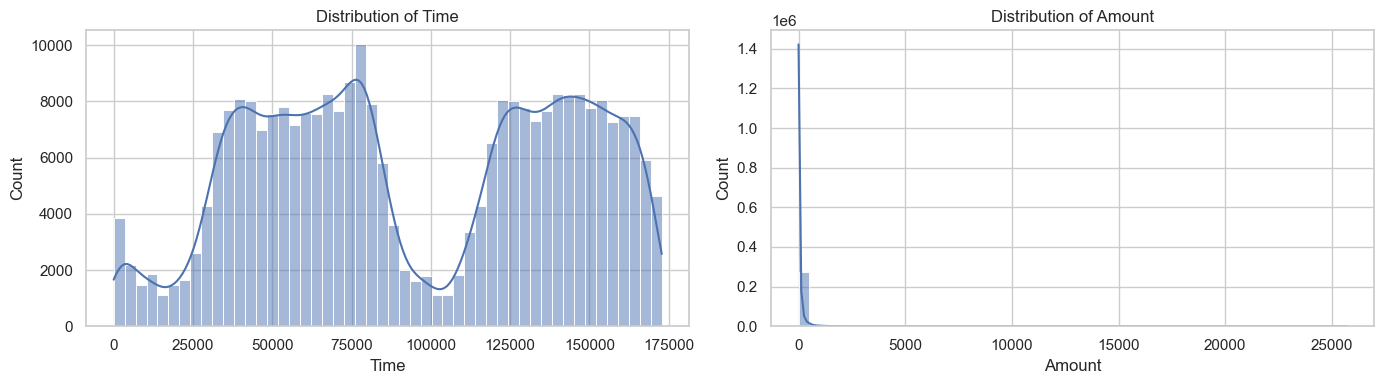

In [11]:
# Plot first 2 numerical features as example
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
for ax, col in zip(axes, ["Time", "Amount"]):
    sns.histplot(cc_cleaned[col], bins=50, kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

### Bivariate Analysis (Numerical Features vs Target)

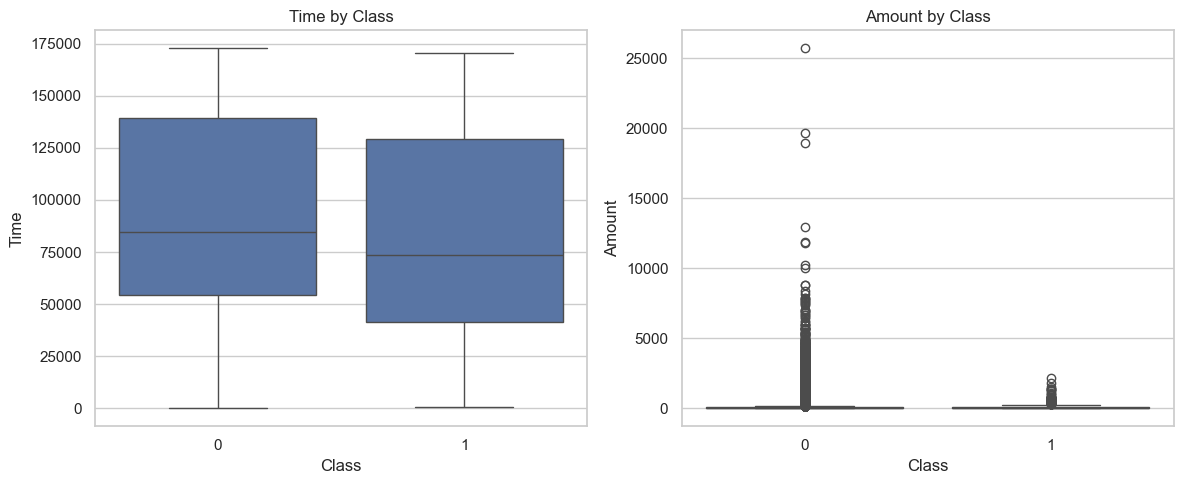

In [12]:
# Boxplots for first 2 numerical features
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax, col in zip(axes, ["Time", "Amount"]):
    sns.boxplot(x="Class", y=col, data=cc_cleaned, ax=ax)
    ax.set_title(f"{col} by Class")
plt.tight_layout()
plt.show()

### Class Distribution

,count,percentage
Class,,
0,283253,0.998333
1,473,0.001667


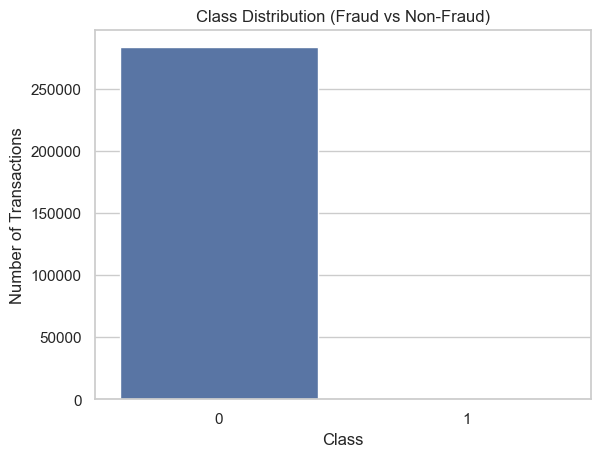

In [13]:
class_dist = eda.class_distribution("Class")
display(class_dist)

# Plot class distribution
sns.barplot(x=class_dist.index, y=class_dist["count"])
plt.title("Class Distribution (Fraud vs Non-Fraud)")
plt.ylabel("Number of Transactions")
plt.show()

In [14]:
data_loader = DataLoader()
data_loader.df = cc_cleaned
data_loader.save_data("../data/processed/creditcard_cleaned.csv")